In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [11]:
im = Image.open('pas_foto.jpg').resize((255, 255))
arr = np.array(im.copy())

In [12]:
arrMinus40 = arr.copy()
arrMinus20 = arr.copy()
arrPlus20 = arr.copy()
arrPlus40 = arr.copy()
keys = np.arange(256)
histOri = np.zeros((256), dtype = np.uint32)
histMinus40 = np.zeros((256), dtype = np.uint32)
histMinus20 = np.zeros((256), dtype = np.uint32)
histPlus20 = np.zeros((256), dtype = np.uint32)
histPlus40 = np.zeros((256), dtype = np.uint32)

In [13]:
for y in range(arr.shape[0]):
    for x in range(arr.shape[1]):
        akum = (int(arr[y,x,0]) + int(arr[y,x,1]) + int(arr[y,x,2]))
        tmp=max(min(int(akum/3),255),0)
        arr[y,x] = [tmp,tmp,tmp]
        tmpMin20 = max(tmp-20,0)
        tmpMin40 = max(tmp-40,0)
        arrMinus20[y,x] = [tmpMin20,tmpMin20,tmpMin20]
        arrMinus40[y,x] = [tmpMin40,tmpMin40,tmpMin40]
        tmpPlus20 = min(tmp+20,255)
        tmpPlus40 = min(tmp+40,255)
        arrPlus20[y,x]=[tmpPlus20,tmpPlus20,tmpPlus20]
        arrPlus40[y,x]=[tmpPlus40,tmpPlus40,tmpPlus40]
        histOri[tmp] = histOri[tmp] + 1
        histMinus20[tmpMin20] = histMinus20[tmpMin20] + 1
        histMinus40[tmpMin40] = histMinus40[tmpMin40] + 1
        histPlus20[tmpPlus20] = histPlus20[tmpPlus20] + 1
        histPlus40[tmpPlus40] = histPlus40[tmpPlus40] + 1

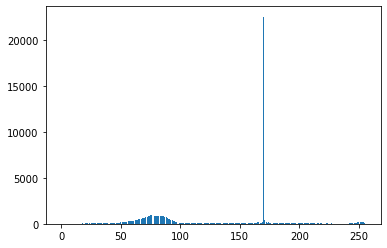

In [14]:
fig = plt.figure(1)
plt.bar(keys, histOri)
fig.canvas.draw()
DataOri = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
DataOri = DataOri.reshape(fig.canvas.get_width_height()[::-1] + (3,))
histImageOri = Image.fromarray(DataOri).resize((255, 255))
histNpOri = np.array(histImageOri)

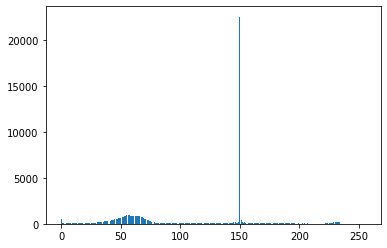

In [15]:
figMinus20 = plt.figure(2)
plt.bar(keys,histMinus20)
figMinus20.canvas.draw()
DataMinus20 = np.frombuffer(figMinus20.canvas.tostring_rgb(), dtype=np.uint8)
DataMinus20 = DataMinus20.reshape(figMinus20.canvas.get_width_height()[::-1] + (3,))
histImageMinus20 = Image.fromarray(DataMinus20).resize((255, 255))
histNpMinus20 = np.array(histImageMinus20)

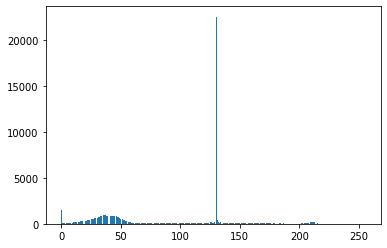

In [16]:
figMinus40 = plt.figure(3)
plt.bar(keys,histMinus40)
figMinus40.canvas.draw()
DataMinus40 = np.frombuffer(figMinus40.canvas.tostring_rgb(), dtype=np.uint8)
DataMinus40 = DataMinus40.reshape(figMinus40.canvas.get_width_height()[::-1] + (3,))
histImageMinus40 = Image.fromarray(DataMinus40).resize((255, 255))
histNpMinus40 = np.array(histImageMinus40)

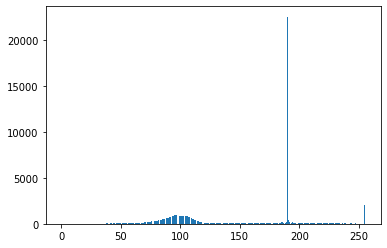

In [17]:
figPlus20 = plt.figure(4)
plt.bar(keys,histPlus20)
figPlus20.canvas.draw()
DataPlus20 = np.frombuffer(figPlus20.canvas.tostring_rgb(), dtype=np.uint8)
DataPlus20 = DataPlus20.reshape(figPlus20.canvas.get_width_height()[::-1] + (3,))
histImagePlus20 = Image.fromarray(DataPlus20).resize((255, 255))
histNpPlus20 = np.array(histImagePlus20)

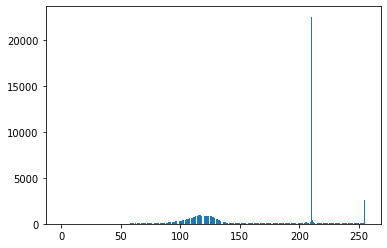

In [18]:
figPlus40 = plt.figure(5)
plt.bar(keys,histPlus40)
figPlus40.canvas.draw()
DataPlus40 = np.frombuffer(figPlus40.canvas.tostring_rgb(), dtype=np.uint8)
DataPlus40 = DataPlus40.reshape(figPlus40.canvas.get_width_height()[::-1] + (3,))
histImagePlus40 = Image.fromarray(DataPlus40).resize((255, 255))
histNpPlus40 = np.array(histImagePlus40)

In [19]:
histStack = np.hstack((histNpMinus40, histNpMinus20, histNpOri, histNpPlus20, histNpPlus40))
imageStack = np.hstack((arrMinus40, arrMinus20, arr, arrPlus20, arrPlus40))

In [21]:
Image.fromarray(np.vstack((histStack, imageStack))).show()